In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
DATA_PATH = 'dados/aprovacao_alunos.xlsx'

df = pd.read_excel(DATA_PATH)
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


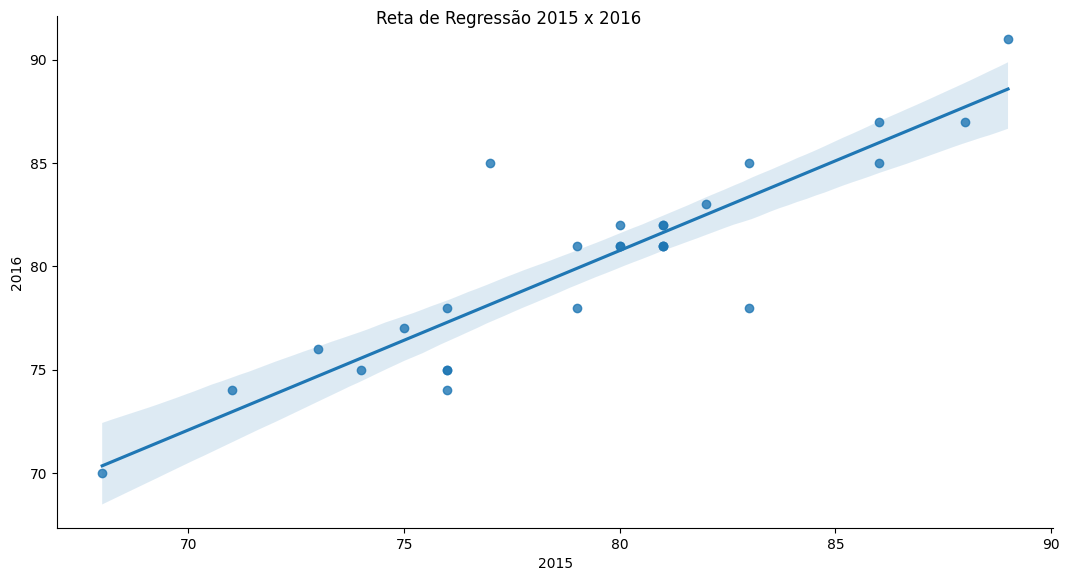

In [5]:
ax = sns.lmplot(x='ano_2015', y='ano_2016', data=df)
ax.figure.set_size_inches(12, 6)
ax.figure.suptitle('Reta de Regressão 2015 x 2016')
ax.set_ylabels('2016')
ax.set_xlabels('2015')
ax

In [11]:
df.drop(columns='UF').corr().round(4)

,ano_2015,ano_2016
ano_2015,1.000,0.895
ano_2016,0.895,1.000


In [13]:
import statsmodels.api as sm

In [16]:
y = df['ano_2016']
X = sm.add_constant(df['ano_2015'])

In [17]:
model_statsmodel = sm.OLS(y, X).fit()

In [18]:
print(model_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.02e-10
Time:                        12:15:33   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [19]:
df['y_previsto'] = model_statsmodel.predict()
df.head()

,UF,ano_2015,ano_2016,y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [20]:
df['residuo'] = df['y_previsto'] - df['ano_2016']
df.head()

,UF,ano_2015,ano_2016,y_previsto,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
